In [38]:
''' Austin Graves DA 790 Capstone #4
    This file reads in our final data set that was created in the DataMerge file.
    This file performs the exploratory analysis of my dataset and creates the 
    graphs of my findings. The logistic regression model is also created in this file.
    It was created as a python notebook (.ipynb) instead of a (.py) file to allow for
    the interactive widgests to work. The code was written in visual studio code.
    The user will be asked to input a team's name at two seperate occasions. They can
    input as many teams as they want, but will type q when they are finished.
'''
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from matplotlib_venn import venn3
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from numpy import array as nparray
from ipywidgets import interact, Dropdown, widgets
from scipy.stats import chi2



In [39]:
# Define Global Variables for Teams (Will be used in Analysis)
DIVCOLORS = {
    'AFC Central':'indianred',
    'AFC East':'darkred',
    'AFC North': 'salmon',
    'AFC South':'brown',
    'AFC West': 'lightcoral',
    'NFC Central': 'lightskyblue',
    'NFC East':'midnightblue',
    'NFC North': 'lightblue',
    'NFC South': 'darkblue',
    'NFC West': 'steelblue'
}
# Features to be used in logistic regression model
FEATURES = ['winner_binary','win_percent','avg_filled', 'pts_home', 'point_differential', 'yds_home', 'yds_away']

In [40]:
# Function that returns the count of how many times home team won or loss
def WinLossTotal(dataframe):
    winCount = 0
    LossCount = 0
    for index, row in dataframe.iterrows():
        if row['winner'] == row['home_team_city']+' '+row['home_team_name']:
            winCount+=1
        else:
            LossCount+=1
    return(winCount,LossCount)
# Function to determine which division to use based on the year
def TeamDivision(team, year):
    if year >=1993 and year < 1995:
        divisions = {
            'AFC Central': ['Titans','Steelers','Bengals','Browns'],
            'AFC East': ['Dolphins','Colts','Jets','Bills','Patriots'],
            'AFC West': ['Raiders','Broncos','Chiefs','Seahawks','Chargers'],
            'NFC Central': ['Vikings','Buccaneers','Packers','Lions','Bears'],
            'NFC West': ['Saints','Rams','Panthers','49ers','Falcons'],
            'NFC East': ['Giants','Eagles','Redskins','Cowboys','Cardinals']
        }
    elif year == 1995:
        divisions = {
            'AFC Central': ['Jaguars','Titans','Steelers','Bengals','Browns'],
            'AFC East': ['Dolphins','Colts','Jets','Bills','Patriots'],
            'AFC West': ['Raiders','Broncos','Chiefs','Seahawks','Chargers'],
            'NFC Central': ['Vikings','Buccaneers','Packers','Lions','Bears'],
            'NFC West': ['Saints','Rams','Panthers','49ers','Falcons'],
            'NFC East': ['Giants','Eagles','Redskins','Cowboys','Cardinals']
        }
    elif year >= 1996 and year <= 1998:
        divisions = {
            'AFC Central': ['Ravens','Titans','Steelers','Bengals','Jaguars'],
            'AFC East': ['Dolphins','Colts','Jets','Bills','Patriots'],
            'AFC West': ['Raiders','Broncos','Chiefs','Seahawks','Chargers'],
            'NFC Central': ['Vikings','Buccaneers','Packers','Lions','Bears'],
            'NFC West': ['Saints','Rams','Panthers','49ers','Falcons'],
            'NFC East': ['Giants','Eagles','Redskins','Cowboys','Cardinals']
        }
    elif year == 1999:
        divisions = {
            'AFC Central': ['Jaguars','Titans','Steelers','Ravens','Bengals','Browns'],
            'AFC East': ['Dolphins','Colts','Jets','Bills','Patriots'],
            'AFC West': ['Raiders','Broncos','Chiefs','Seahawks','Chargers'],
            'NFC Central': ['Vikings','Buccaneers','Packers','Lions','Bears'],
            'NFC West': ['Saints','Rams','Panthers','49ers','Falcons'],
            'NFC East': ['Giants','Eagles','Redskins','Cowboys','Cardinals']
        }
    elif year >= 2000 and year < 2002:
        divisions = {
            'AFC Central': ['Titans','Ravens','Steelers','Jaguars','Bengals','Browns'],
            'AFC East': ['Dolphins','Colts','Jets','Bills','Patriots'],
            'AFC West': ['Raiders','Broncos','Chiefs','Seahawks','Chargers'],
            'NFC Central': ['Vikings','Buccaneers','Packers','Lions','Bears'],
            'NFC West': ['Saints','Rams','Panthers','49ers','Falcons'],
            'NFC East': ['Giants','Eagles','Redskins','Cowboys','Cardinals']
        }
    else:
        divisions = {
            'AFC East': ['Dolphins','Jets','Bills','Patriots'],
            'AFC North': ['Ravens','Steelers','Bengals','Browns'],
            'AFC South': ['Titans','Jaguars','Colts','Texans'],
            'AFC West': ['Raiders','Broncos','Chiefs','Chargers'],
            'NFC East': ['Giants','Eagles','Redskins','Cowboys',],
            'NFC North': ['Vikings','Packers','Lions','Bears'],
            'NFC South': ['Falcons','Saints','Panthers','Buccaneers'],
            'NFC West': ['Rams','49ers','Seahawks','Cardinals']   
        }
    for division, teams in divisions.items():
        if team in teams:
            return division
    return None

# Function to Display Graph for top/bottom over every year
def GraphUpdate(data,data2,years):
    years_df = data[data['year']==years]
    midYearly_df = years_df.groupby(['home_team_name','division'])['avg_filled'].mean().reset_index()
    midYearly_df = midYearly_df.sort_values(by=['division','home_team_name'],ascending=False)
    print(midYearly_df.describe())
    colors = [DIVCOLORS[division] for division in midYearly_df['division']]
    plt.figure(figsize=(27,20))
    plt.subplot(2,1,1)
    plt.bar(midYearly_df['home_team_name'],midYearly_df['avg_filled'],color=colors)
    plt.xlabel('Team Name',fontweight='bold')
    plt.ylabel('Average Percent Of Stadium Capacity Filled (%)',fontweight='bold')
    plt.title('Average Stadium Capacity Filled By Division And Conference',fontweight='bold')
    plt.ylim(0,100)
    plt.yticks(np.arange(0,105,step=5))
    plt.xticks(rotation=55)
    
    # Create Scatter Plot
    years2_df = data2[data2['year']==years]
    winLoss_df = years2_df.groupby(['home_team_name','division'])[['season_wins','season_loss']].mean().reset_index()
    winLoss_df = winLoss_df.sort_values(by=['season_wins'],ascending=False)
    plt.subplot(2,1,2)
    wins = winLoss_df['season_wins'] 
    losses = winLoss_df['season_loss']
    plt.scatter(losses, wins, color='black')
    plt.xlabel('Number of Losses', fontweight='bold')
    plt.ylabel('Number of Wins',fontweight='bold')
    plt.title('Record Of Teams In Regular Season (1993-2019)',fontweight='bold')
    
    scale = 7
    prevRecord = 0
    # Print name next to dot for each team
    for index,row in winLoss_df.iterrows():
        name = row['home_team_name']
        win = row['season_wins'] 
        loss = row['season_loss']
        division = TeamDivision(name, years)
        team_color = DIVCOLORS.get(division)
        recordCount = (row['season_wins'],row['season_loss'])
        if recordCount != prevRecord:
            scale = 7
        plt.annotate(name,(loss,win),textcoords='offset points',xytext=(0,scale),ha='center',color=team_color)
        scale +=10
        prevRecord = recordCount 
    
    # Create copy of color dictionary to edit based on the year
    # Divisions changed 2002 onwards, this will determine what legend to show on graph
    temp_div = DIVCOLORS.copy()
    if years <2002:
        del temp_div['AFC North']
        del temp_div['AFC South']
        del temp_div['NFC North']
        del temp_div['NFC South']
        for division, color in temp_div.items():
            plt.scatter([],[],color=color, label=division)
    else:
        del temp_div['AFC Central']
        del temp_div['NFC Central']
        for division, color in temp_div.items():
            plt.scatter([],[],color=color, label=division)
    plt.legend(bbox_to_anchor=(1.07,2.2),loc='upper right')
    plt.yticks(np.arange(0,17))
    plt.xticks(np.arange(0,17))
    plt.show()

# Correlation Matrix for teams and features
def CorrelationMatrix(team,corrDict):
    plt.figure(figsize=(8, 8))
    plt.imshow(corrDict[team], cmap='coolwarm')
    plt.colorbar(label='Correlation Value', pad =0.2)
    plt.title(f'Correlation Matrix for {team} Based On Desired Features', fontweight='bold')
    plt.xticks(np.arange(len(corrDict[team])), FEATURES,rotation=45)
    plt.yticks(np.arange(len(corrDict[team])), FEATURES)
    plt.xlabel('Chosen Features',fontweight='bold')
    plt.ylabel('Chosen Features',fontweight='bold')
    plt.show()

# Function to Loop through results of nested list with dictionary of model results
def TeamModelResults(name,results):
    for result in results:
        for value in result:
            if value['Team'] == name:
                return value
    
    

In [41]:
### Beginning of Analysis ###

# Read dataset into dataframe
df = pd.read_csv('FinalDataSet.csv')

# Rename column to show it will be the average
df = df.rename(columns={'stadium_filled':'avg_filled'})

# Add New Column for every teams division (changes from 2002 onward) 
df['division'] = df.apply(lambda row: TeamDivision(row['home_team_name'],row['year']),axis=1)

# Create a Column for full name of team and city
df['fullname'] = df['home_team_city']+' '+df['home_team_name']

# Group teams by name and find top/bottom 5 teams in avg % stadium filled
grouped_df = df.groupby('home_team_name', as_index=False)['avg_filled'].mean().sort_values(by='avg_filled', ascending= False)

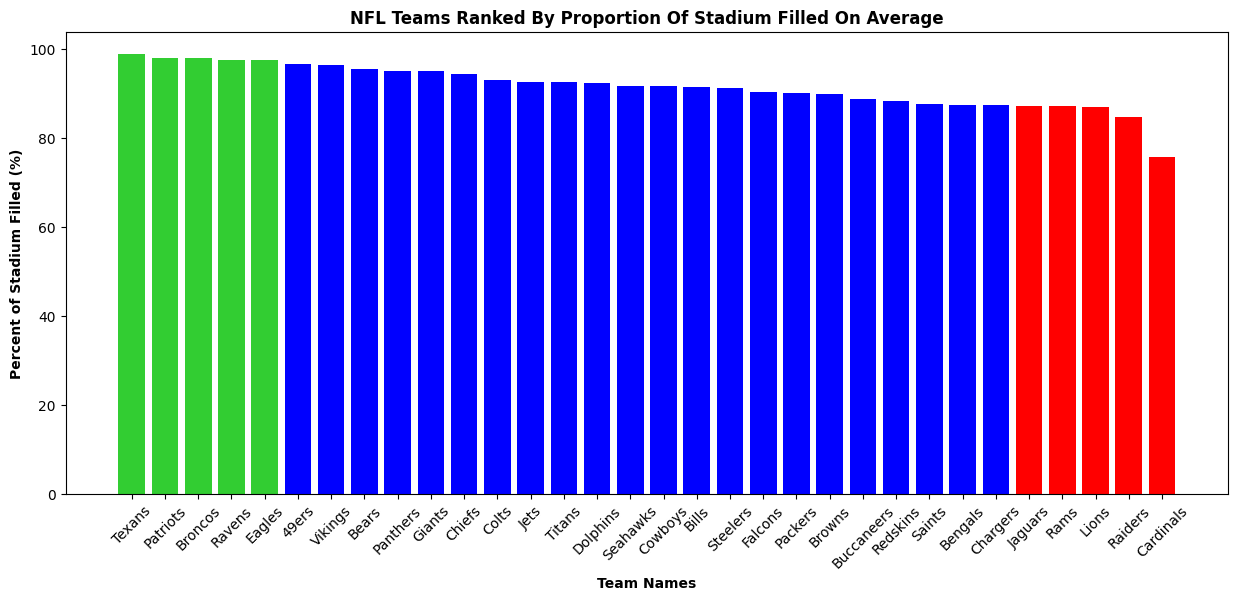

In [42]:

# Graph All 32 Teams based on attendance
plt.figure(figsize=(15,6))
plt.bar(grouped_df['home_team_name'],grouped_df['avg_filled'], color = 'blue')
plt.bar(grouped_df['home_team_name'].head(),grouped_df['avg_filled'].head(), color = 'limegreen')
plt.bar(grouped_df['home_team_name'].tail(),grouped_df['avg_filled'].tail(), color = 'red')
plt.xlabel('Team Names',fontweight='bold')
plt.ylabel('Percent of Stadium Filled (%)',fontweight='bold')
plt.title('NFL Teams Ranked By Proportion Of Stadium Filled On Average', fontweight='bold')
plt.xticks(rotation=45)
plt.show()


In [43]:
# Group data by their team,year,and division to find avg_filled per year
groupSort_df = df.groupby(['home_team_name','year','division'], as_index=False)['avg_filled'].mean().sort_values(by=['year','avg_filled'],ascending=False)

# Group Teams based on their record each year
groupRecord_df = df.groupby(['home_team_name','year','division'],as_index=False)[['season_wins','season_loss']].mean().sort_values(by=['year'],ascending=False)

# Get Unique years and create dropdown box. Display Interactive Graph to allow user to look at chosen years
years = sorted(groupSort_df['year'].unique())
year_widget = widgets.Dropdown(
    options=years,
    value=years[0],
    description='Years'
)
interact(GraphUpdate,data = widgets.fixed(groupSort_df),data2=widgets.fixed(groupRecord_df),years=year_widget)



interactive(children=(Dropdown(description='Years', options=(1993, 1994, 1995, 1996, 1998, 1999, 2000, 2001, 2…

<function __main__.GraphUpdate(data, data2, years)>

In [44]:
# Create 2 dataframes with the top and bottom 5 teams. These are our focus teams
top5_df = pd.merge(grouped_df.head(),df,on='home_team_name', how='left')
bot5_df = pd.merge(grouped_df.tail(),df,on='home_team_name',how='left')

# Display top and bottom 5 teams for future reference
print(top5_df['fullname'].unique())
print(bot5_df['fullname'].unique())




['Houston Texans' 'New England Patriots' 'Denver Broncos'
 'Baltimore Ravens' 'Philadelphia Eagles']
['Jacksonville Jaguars' 'Los Angeles Rams' 'St. Louis Rams'
 'Detroit Lions' 'Oakland Raiders' 'Arizona Cardinals']


In [45]:
# Determine how many total wins and loses teams had at home from both groups
topWins, topLoss = WinLossTotal(top5_df)
botWins, botLoss = WinLossTotal(bot5_df)

Top Wins: 627
Top Losses: 325
Bottom Wins: 484
Bottom Losses: 484


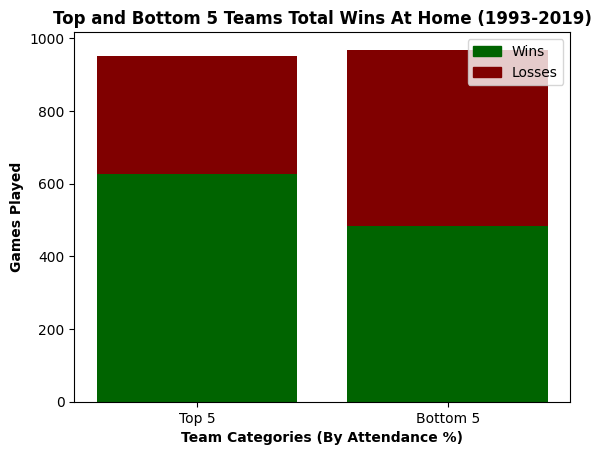

In [46]:
# Graph Results as stacked bar chart
values = ['Top 5','Bottom 5']
wins = mpatches.Patch(color='darkgreen', label='Wins')
losses = mpatches.Patch(color='maroon',label='Losses')
# Print out results to get exact number
print(f'Top Wins: {topWins}')
print(f'Top Losses: {topLoss}')
print(f'Bottom Wins: {botWins}')
print(f'Bottom Losses: {botLoss}')
plt.bar(values[0],topWins, label='WON',color='darkgreen')
plt.bar(values[0],topLoss,bottom=topWins, label = 'LOST',color='maroon')
plt.bar(values[1], botWins, label = 'WON',color='darkgreen')
plt.bar(values[1], botLoss, bottom=botWins, label = 'LOST',color='maroon')
plt.xlabel('Team Categories (By Attendance %)', fontweight='bold')
plt.ylabel('Games Played',fontweight='bold')
plt.legend(handles=[wins,losses])
plt.title('Top and Bottom 5 Teams Total Wins At Home (1993-2019)',fontweight='bold')
plt.show()


In [47]:
homeWins = 0
totalGames=0
combindTopBot = pd.concat([top5_df,bot5_df])
teamRec = {}

# Create a team dictionary for chargers and rams since they had multiple cities
chargersDict = {'Los Angeles Chargers':'Los Angeles/San Diego Chargers','San Diego Chargers':'Los Angeles/San Diego Chargers'}
ramsDict = {'St. Louis Rams': 'St. Louis/Los Angeles Rams','Los Angeles Rams':'St. Louis/Los Angeles Rams'}

# Loop through unique team names to assign values
for team in combindTopBot['fullname'].unique():
    totalGames = len(combindTopBot[combindTopBot['fullname'] == team])
    homeWins = combindTopBot[(combindTopBot['fullname'] == team) & (combindTopBot['winner']==team)]
    # If the team is in the chargers or rams dictionary, make it the desired value instead
    if team in chargersDict:
        team = chargersDict[team] 
    if team in ramsDict:
        team = ramsDict[team]
    count = len(homeWins)
    if team in teamRec:
        teamRec[team]['Games Played'] += totalGames
        teamRec[team]['Home Wins'] += count
    else:
        teamRec[team] = {'Games Played': totalGames, 'Home Wins': count}
        
# Display results
print(teamRec)

{'Houston Texans': {'Games Played': 144, 'Home Wins': 77}, 'New England Patriots': {'Games Played': 208, 'Home Wins': 158}, 'Denver Broncos': {'Games Played': 208, 'Home Wins': 139}, 'Baltimore Ravens': {'Games Played': 184, 'Home Wins': 130}, 'Philadelphia Eagles': {'Games Played': 208, 'Home Wins': 123}, 'Jacksonville Jaguars': {'Games Played': 192, 'Home Wins': 99}, 'St. Louis/Los Angeles Rams': {'Games Played': 176, 'Home Wins': 86}, 'Detroit Lions': {'Games Played': 208, 'Home Wins': 102}, 'Oakland Raiders': {'Games Played': 192, 'Home Wins': 90}, 'Arizona Cardinals': {'Games Played': 200, 'Home Wins': 107}}


<function matplotlib.pyplot.show(close=None, block=None)>

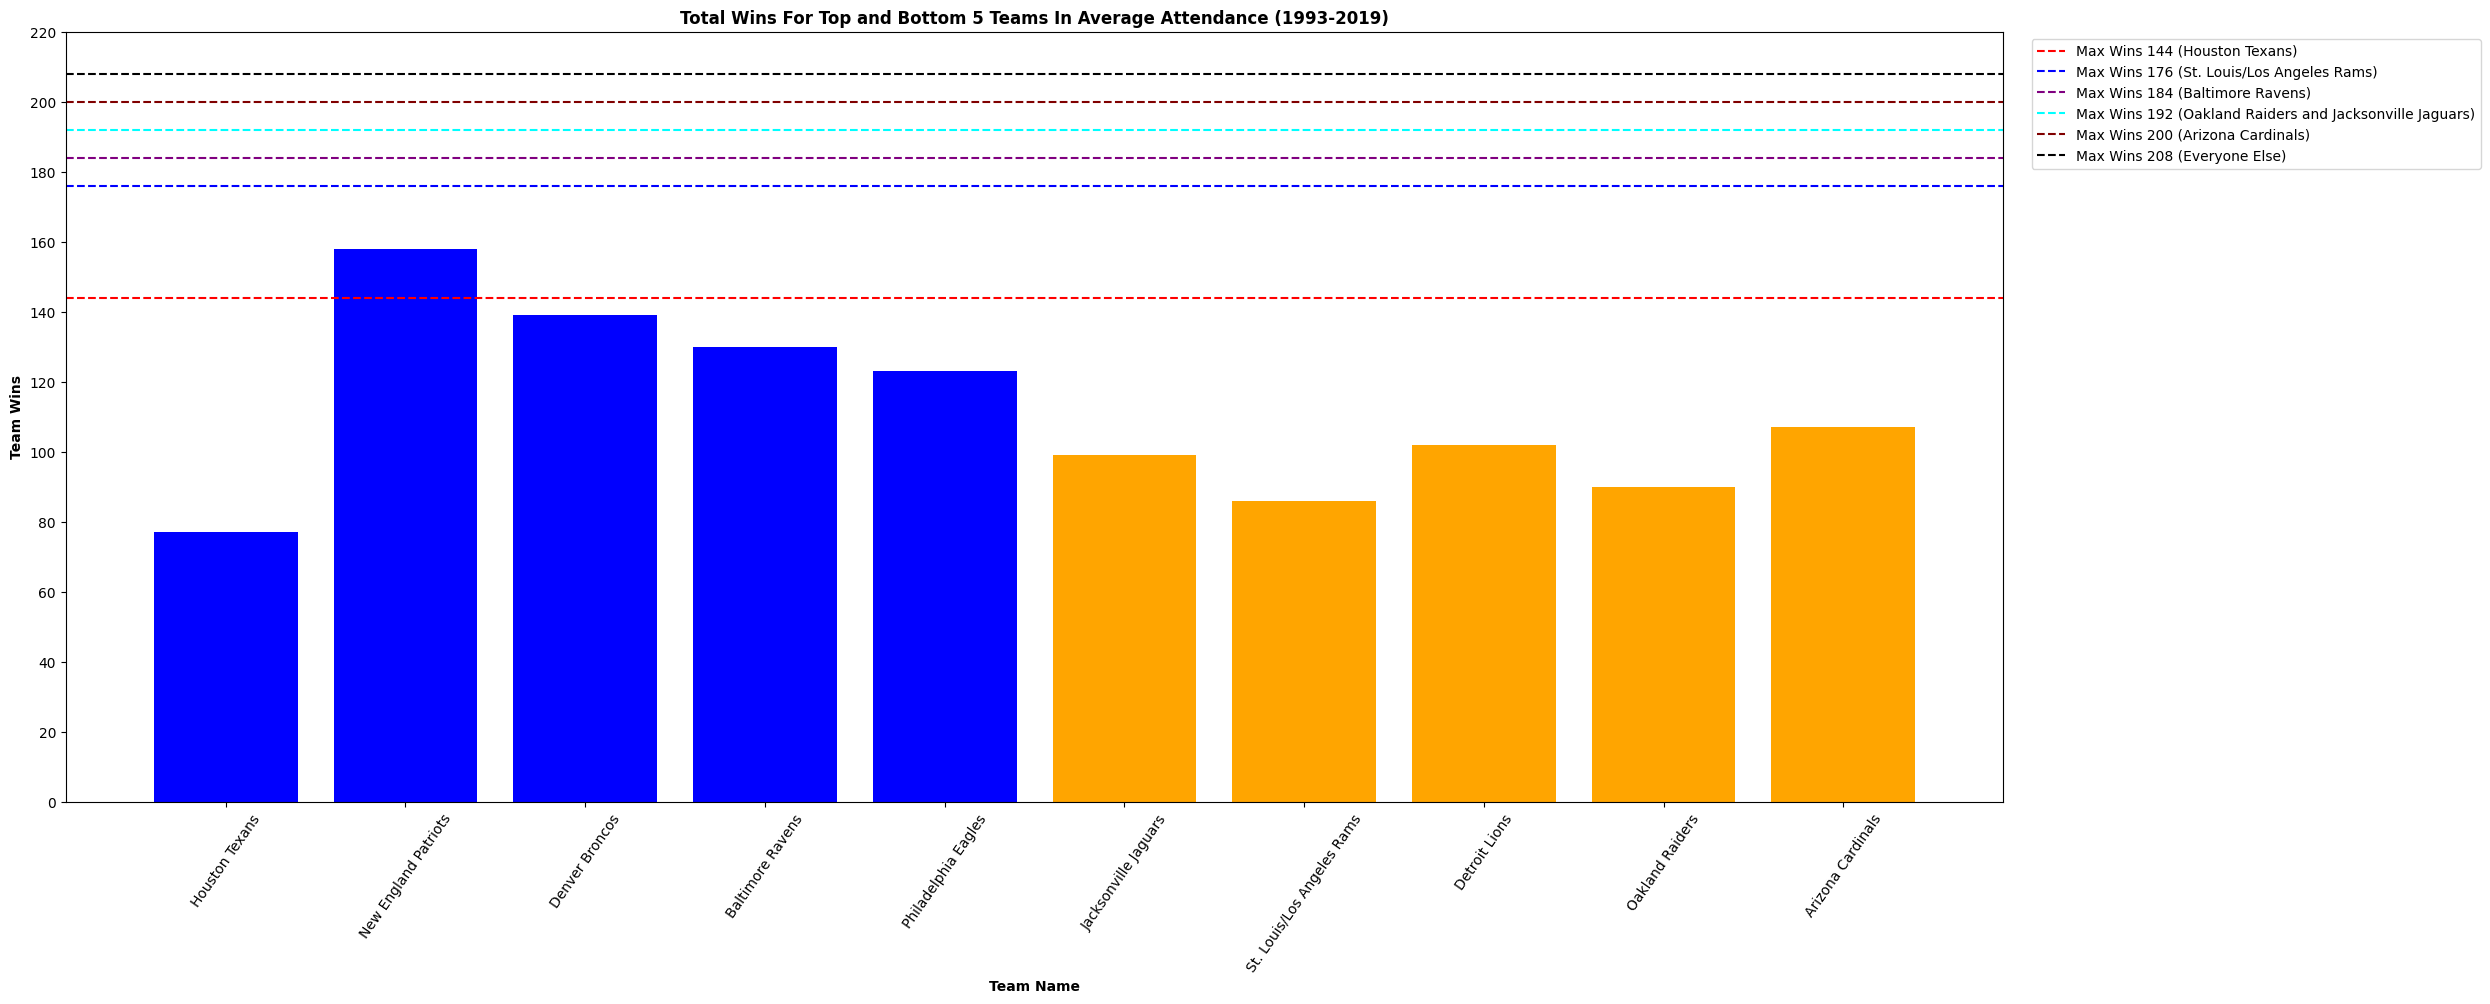

In [48]:
# Graph Results from above analysis
teams = list(teamRec.keys())
wins = [teamRec[team]['Home Wins'] for team in teams]

# Have colors for bottom and top 5 teams in attendance
colors = ['blue']*5 + ['orange']*5
plt.figure(figsize=(25,10))
plt.bar(teams, wins, color=colors)
plt.xlabel('Team Name',fontweight='bold')
plt.ylabel('Team Wins',fontweight='bold')
plt.title('Total Wins For Top and Bottom 5 Teams In Average Attendance (1993-2019)',fontweight='bold')
plt.ylim(0,220)
plt.yticks(np.arange(0,240,step=20))
# Add horizontal line for different max win potential. Value was determined by the above result
plt.axhline(y=144,color='red', linestyle='--',label='Max Wins 144 (Houston Texans)')
plt.axhline(y=176, color='blue', linestyle='--',label='Max Wins 176 (St. Louis/Los Angeles Rams)')  
plt.axhline(y=184, color='purple', linestyle='--',label='Max Wins 184 (Baltimore Ravens)') 
plt.axhline(y=192, color='cyan', linestyle='--',label='Max Wins 192 (Oakland Raiders and Jacksonville Jaguars)')  
plt.axhline(y=200, color='maroon', linestyle='--',label='Max Wins 200 (Arizona Cardinals)')  
plt.axhline(y=208, color='black', linestyle='--',label='Max Wins 208 (Everyone Else)')  
plt.xticks(rotation=55)
plt.legend(loc='upper right', bbox_to_anchor=(1.25,1))
plt.show

In [49]:
# Find the correlation of home attendance and a teams winning percentage
allTeams = sorted(list(df['home_team_name'].unique()))
avgCorr=0
allCorr = []
allWinPerc = []
featuresCorr = []
corrMatrixList = []
# Reload Original Excel File
df = pd.read_csv('FinalDataSet.csv')
df = df.rename(columns={'stadium_filled':'avg_filled'})
for team in allTeams:
    temp = df[df['home_team_name'] == team]
    # Remove warning with copy of dataframe
    temp = temp.copy()
    temp['win_percent'] = temp.groupby(['year','home_team_name'],as_index=False)[['winner_binary']].transform('mean')*100
    # Retreive only columns with features for correlation matrix
    corrMatrix = temp.loc[:,FEATURES]
    # Calculate Correlation coefficient between avg_filled and win_percent for team
    # Close to 1: As one increases the other increase, close to -1 as one decrease the other increases
    corr = temp['avg_filled'].corr(temp['win_percent']).round(5)
    avgWinperc = temp['win_percent'].mean()
    allCorr.append([team,corr])
    allWinPerc.append([team,avgWinperc])
    corrMatrixList.append([team,corrMatrix.corr().round(5)])
# Sort the correlation Coefficients in the List to find top 5
topCorr = sorted(allCorr, key=lambda x: x[1], reverse=True)[:5]
botCorr = sorted(allCorr, key=lambda x: x[1])[:5]
topWinPerc = sorted(allWinPerc,key=lambda x: x[1], reverse=True)[:5]
botWinPerc = sorted(allWinPerc, key=lambda x: x[1])[:5]

In [50]:
# Create dictionary from list of correlation coefficient matrixes
corrDict = {name: corr for name, corr in corrMatrixList}

# Create interactive dropdown widget
choices = [name[0] for name in corrMatrixList]
initial_value = str(corrMatrixList[0][0])
teamMenu = Dropdown(options=choices,description='Team:', value=initial_value)

# Create interactive widget to allow user to select desired team
interact(CorrelationMatrix,team=teamMenu,corrDict=widgets.fixed(corrDict))


interactive(children=(Dropdown(description='Team:', options=('49ers', 'Bears', 'Bengals', 'Bills', 'Broncos', …

<function __main__.CorrelationMatrix(team, corrDict)>


Standard Scaling for features for Titans
Accuracy Train: 0.80625
Accuracy Test: 0.8
Accuracy Overall: 0.455
Count: 40
Precision: 0.7619047619047619
Recall: 0.8421052631578947
Harmonic: 0.8


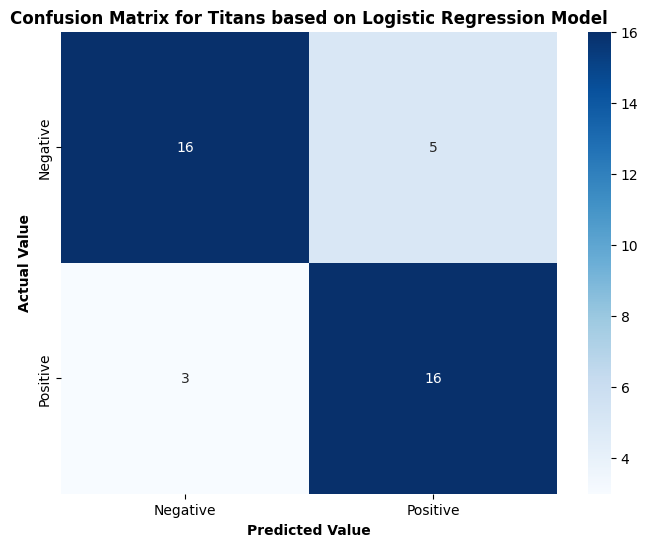

In [51]:
modelResults = []
CoeffList = []

# Loop through all teams in dataset
for x in allTeams:
    try:
        # Create a list of features, remove the two uneeded columns
        features = FEATURES.copy()
        features.remove('winner_binary')
        features.remove('win_percent')
        
        # Create a dataframe using the features you want for your team
        temp = df[df['home_team_name']== x]
        teamX = temp.copy()

        # Determine what columns to drop if they are not a desired feature
        dropColumns = [column for column in teamX.columns if column not in features]

        teamX = teamX.drop(columns=dropColumns, axis=1)
        teamY = temp['winner_binary']

        # Split into test and training datasets, using 20-80%
        trainX, testX, trainY, testY = train_test_split(teamX, teamY, test_size=0.2, random_state=42)

        # standard scalar Standardization
        standardScaler = StandardScaler() 

        # Fix training data
        trainXstanScale = standardScaler.fit_transform(trainX)

        # Transform Data
        testXstanScale = standardScaler.transform(testX)

        # Construct Logistic regression object for standard normalization
        logregrstanScale = linear_model.LogisticRegression(random_state=33,solver="lbfgs", max_iter=1000,fit_intercept=True)

        # Train model
        logregrstanScale.fit(trainXstanScale, trainY.values)

        # Transform training data
        trainXstanScale = standardScaler.fit_transform(trainX)

        # Predict the Values
        y_predstanScale = logregrstanScale.predict(testXstanScale)

        # Calculate Metrics
        trainscore = logregrstanScale.score(trainXstanScale, trainY.values)
        testscore = logregrstanScale.score(testXstanScale, testY.values)
        overallscore = logregrstanScale.score(teamX.values, teamY.values)
        
        # Construct a confusion matrix
        tn, fp, fn, tp = metrics.confusion_matrix(testY, y_predstanScale).ravel()
        precision = tp/(tp+fp) # Less fp, the better precision
        recall = tp/(tp+fn) # Less fn, the better recall
        harmonic = 2*tp/(tp+fp)*tp/(tp+fn)/(tp/(tp+fp)+tp/(tp+fn))

        # Begin Covariance Matrix creation for features
        coefficients = logregrstanScale.coef_

        # Calculate Residuals
        residual = (logregrstanScale.predict(trainXstanScale)-trainY)

        # Calculate residual sum of squares
        residSumSquare = np.sum(residual ** 2)

        # Obtain Degree of freedom
        degreeFree = trainX.shape[0]-trainX.shape[1]

        # Calculate Variance 
        var = residSumSquare/degreeFree

        # Perform linear Algebra of feature matrix and the transpose of feature matrix. Ordinary least squares
        covMatrix = np.linalg.inv(trainXstanScale.T @ trainXstanScale) * var

        # Gather Coefficients for each feature and save it to a list
        featureCoeff = logregrstanScale.coef_[0]

        # Create a list that stores the feature name and its coefficient value
        nameCoeff = list(zip(features,featureCoeff))
        CoeffList.append([x,nameCoeff])

        # Store values to list as a dictionary
        modelResults.append([{'Team':x,'TrainScore':trainscore,'TestScore':testscore,'OverallScore':overallscore,'Precision':precision,'Recall':recall,
                              'Harmonic':harmonic,'Length':len(y_predstanScale),'TN':tn,'FP':fp,'FN':fn,'TP':tp,'CovarianceMatrix':covMatrix}])
    except:
        print("Error!")
# Ask user what teams they would like to see using this model
while True:
    try:
        choice = input("Please Enter Team Name (Excluding City) or Q to quit: ").title()
        if choice == 'Q':
            break
        # Check For Special Case team
        if choice == '49Ers':
            choice = '49ers'
        if choice not in allTeams:
            print("Team not found. Please enter only team name. Ex: Jaguars, Raiders, 49ers")
            continue

        # Find the values of the desired team
        decision = TeamModelResults(choice,modelResults)

        # Display Metrics
        print(f"\nStandard Scaling for features for {decision['Team']}")
        print("Accuracy Train:", decision['TrainScore'])
        print("Accuracy Test:",  decision['TestScore'])
        print("Accuracy Overall:", decision['OverallScore'])
        print("Count:", decision['Length'])
        print("Precision:",decision['Precision']) # Correct P to total predicted P
        print("Recall:",decision['Recall']) # Correct P to all actual P
        print("Harmonic:",decision['Harmonic']) # F1 score- harmonic mean of precision and recall
        
        # Graph Confusion Matrix
        matrix = np.array([[decision['TN'],decision['FP']],[decision['FN'],decision['TP']]])
        plt.figure(figsize=(8,6))
        sns.heatmap(matrix, annot=True, cmap='Blues', xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
        plt.xlabel('Predicted Value',fontweight='bold')
        plt.ylabel('Actual Value',fontweight='bold')
        plt.title(f'Confusion Matrix for {choice} based on Logistic Regression Model',fontweight='bold')
        plt.show()
    except:
        print("Error!")

Teams where average stadium filled was not significant: Panthers, Patriots, 49ers, Giants, Broncos


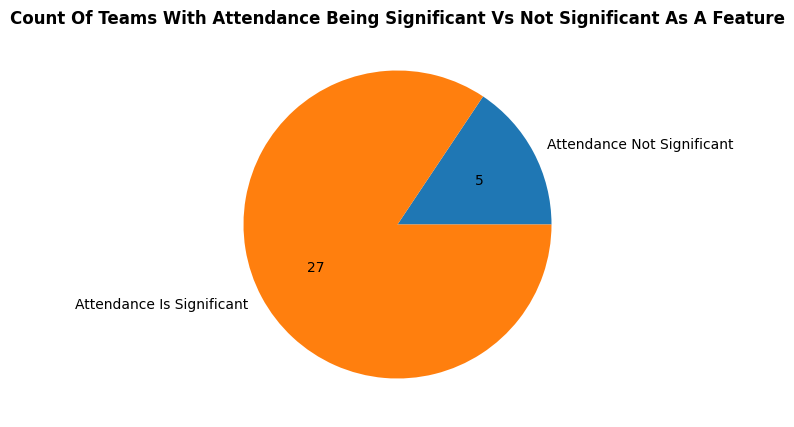

In [52]:
# Test the coefficients for each team
significantCoeff = []
for x in range(len(allTeams)):
    team, coefficients = CoeffList[x]
    coeff_names, coeffs = zip(*coefficients)
    # Perform a Wald chi-square Test at 0.05 level of significance for coefficients
    # H0: Bi = 0 (No Effect)
    # H1: Bi != 0 (Relationship between feature and outcome)
    # Calculate standard errors of covariance matrix diagonals
    standErrors = np.sqrt(np.diag(modelResults[x][0]['CovarianceMatrix']))

    # Calculate z scores for each coefficient
    zScores = coeffs/standErrors

    # Calculate P-values
    pValues = 2*(1-chi2.cdf(zScores**2, df=1))

    # Test Significance at 0.05
    sigCoeff = [(feature,coeffs) for feature, coeffs, pValues in zip(coeff_names,coeffs,pValues) if pValues < 0.05]

    # Append a list containing the significant coeffs and the team name
    significantCoeff.append([team,sigCoeff])

# Loop through list to see what teams had avg_filled as significant
sigTeams = []
for i in range(len(significantCoeff)):
    # Unpack nested tuples and use _ as placeholder for unwanted coefficient value
    avgFilledSig = any(value == 'avg_filled' for value, _ in significantCoeff[i][1])
    if avgFilledSig == True:
        # If avg_filled is significant, the team name is appended to the list
        sigTeams.append(significantCoeff[i][0])

# Find what teams are not on in the list by using sets
allTeamsSet = set(allTeams)
sigTeamsSet = set(sigTeams)
missingTeams = list(allTeamsSet-sigTeamsSet)

# Display what teams did not have avg_filled as significant feature
print("Teams where average stadium filled was not significant: "+', '.join(missingTeams))

# Create Pie Graph to Demonstrate the teams that don't have avg_filled has relevant feature
plt.figure(figsize=(5,5))
# Display data as the total count instead of as a percent with lamba function
plt.pie([len(missingTeams),len(sigTeams)], labels=['Attendance Not Significant','Attendance Is Significant'],autopct=lambda x: '{:.0f}'.format(x * 32 / 100))
plt.title('Count Of Teams With Attendance Being Significant Vs Not Significant As A Feature',fontweight='bold')
plt.show()




Standard Scaling for features for Titans
Accuracy Train: 0.80625
Accuracy Test: 0.8
Accuracy Overall: 0.455
Count: 40
Precision: 0.7619047619047619
Recall: 0.8421052631578947
Harmonic: 0.8


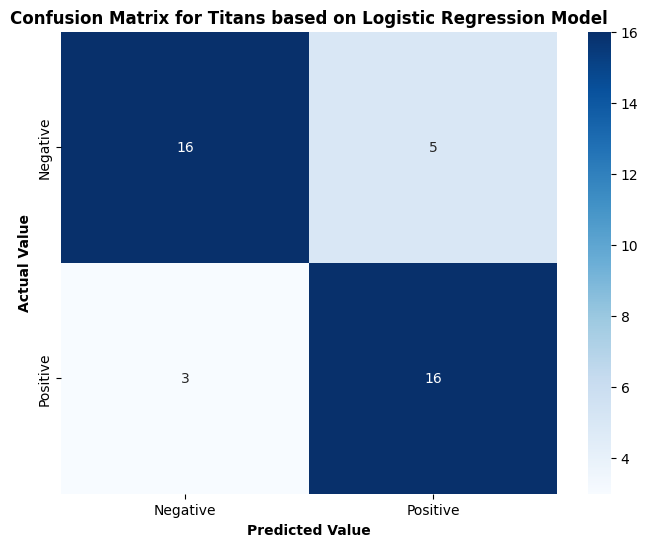

In [53]:
# Rerun Logistic Regression Model Using only the features that were statistically relevant
modelResultsNew = []

# Loop through nested lists that contains the name and the list of significant features
for x in range(len(significantCoeff)):
    try:
        featuresNew = []
        feats = significantCoeff[x][1]
        teamName = significantCoeff[x][0]
        # Append feature names to a new list to be used in model
        for feat in feats:
            featuresNew.append(feat[0])

        # Create a dataframe using the features you want for your team
        temp = df[df['home_team_name']== teamName]
        teamXNew = temp.copy()
        dropColumns = [column for column in teamXNew.columns if column not in featuresNew]
        teamXNew = teamXNew.drop(columns=dropColumns, axis=1)
        teamYNew = temp['winner_binary']

        # Split into test and training datasets, using 20-80%
        trainXNew, testXNew, trainYNew, testYNew = train_test_split(teamXNew, teamYNew, test_size=0.2, random_state=42)

        # standard scalar Standardization
        standardScalerNew = StandardScaler()   

        # Transform training data
        trainXstanScaleNew = standardScalerNew.fit_transform(trainXNew)

        # Transform Data
        testXstanScaleNew = standardScalerNew.transform(testXNew)

        # ConstructLogistic regression object for standard normalization
        logregrstanScaleNew = linear_model.LogisticRegression(random_state=33,solver="lbfgs", max_iter=1000,fit_intercept=True)

        # Train model
        logregrstanScaleNew.fit(trainXstanScaleNew, trainYNew.values)

        # Predict the Values
        y_predstanScaleNew = logregrstanScaleNew.predict(testXstanScaleNew)

        # Calculate Metrics
        trainscoreNew = logregrstanScaleNew.score(trainXstanScaleNew, trainYNew.values)
        testscoreNew = logregrstanScaleNew.score(testXstanScaleNew, testYNew.values)
        overallscoreNew = logregrstanScaleNew.score(teamXNew.values, teamYNew.values)
        
        # Construct a confusion matrix
        tnNew, fpNew, fnNew, tpNew = metrics.confusion_matrix(testYNew, y_predstanScaleNew).ravel()
        precisionNew = tpNew/(tpNew+fpNew) # Less fp, the better precision. Ideal for this scenario
        recallNew = tpNew/(tpNew+fnNew) # Less fn, the better recall
        harmonicNew = 2*tpNew/(tpNew+fpNew)*tpNew/(tpNew+fnNew)/(tpNew/(tpNew+fpNew)+tpNew/(tpNew+fnNew))

        modelResultsNew.append([{'Team':teamName,'TrainScore':trainscoreNew,'TestScore':testscoreNew,'OverallScore':overallscoreNew,'Precision':precisionNew,'Recall':recallNew,
                              'Harmonic':harmonicNew,'Length':len(y_predstanScaleNew),'TN':tnNew,'FP':fpNew,'FN':fnNew,'TP':tpNew}])
    except:
        print("Error!")

while True:
    try:
        choice = input("Please Enter Team Name (Excluding City) or Q to quit: ").title()
        if choice == 'Q':
            break
        # Check For Special Case team
        if choice == '49Ers':
            choice = '49ers'
        if choice not in allTeams:
            print("Team not found. Please enter only team name. Ex: Jaguars, Raiders, 49ers")
            continue
        # Find the values of the desired team
        decisionNew = TeamModelResults(choice,modelResultsNew)

        # Display Metrics
        print(f"\nStandard Scaling for features for {decisionNew['Team']}")
        print("Accuracy Train:", decisionNew['TrainScore'])
        print("Accuracy Test:",  decisionNew['TestScore'])
        print("Accuracy Overall:", decisionNew['OverallScore'])
        print("Count:", decisionNew['Length'])
        print("Precision:",decisionNew['Precision'])
        print("Recall:",decisionNew['Recall'])
        print("Harmonic:",decisionNew['Harmonic'])
        
        # Graph Confusion Matrix
        matrix = np.array([[decisionNew['TN'],decisionNew['FP']],[decisionNew['FN'],decisionNew['TP']]])
        plt.figure(figsize=(8,6))
        sns.heatmap(matrix, annot=True, cmap='Blues', xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
        plt.xlabel('Predicted Value',fontweight='bold')
        plt.ylabel('Actual Value',fontweight='bold')
        plt.title(f'Confusion Matrix for {choice} based on Logistic Regression Model',fontweight='bold')
        plt.show()
    except:
        print("Error!")
    


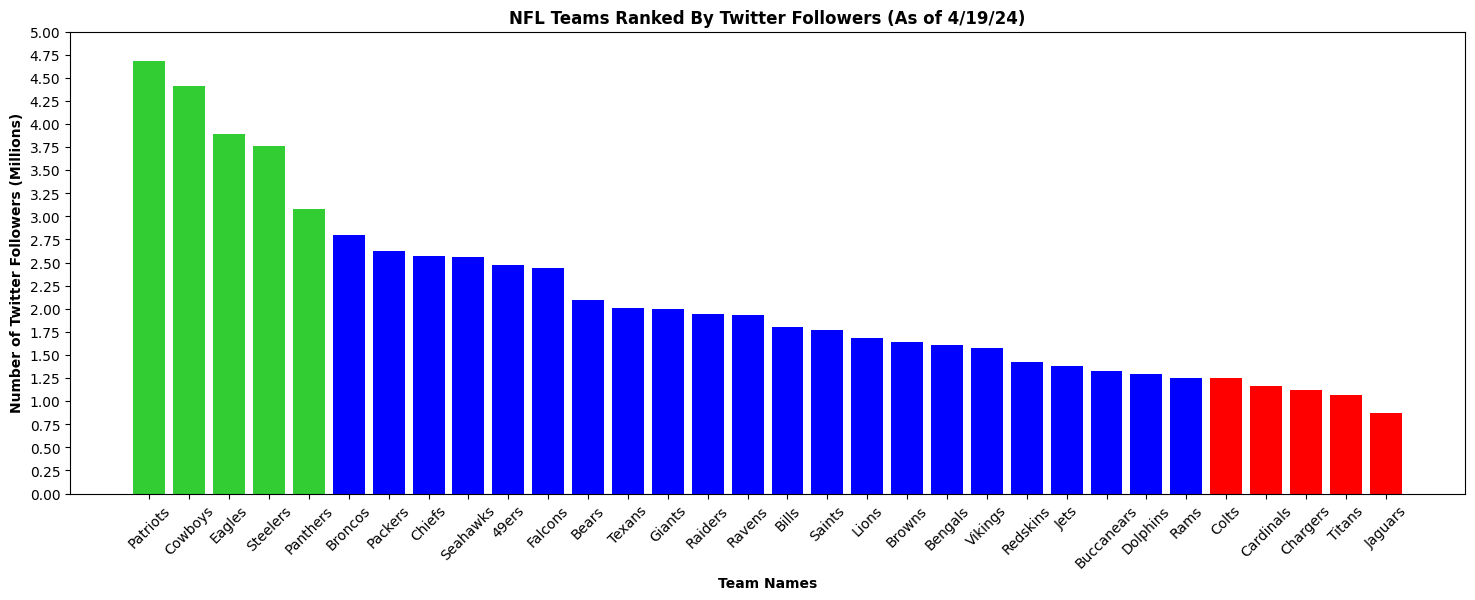

In [54]:
# Import Twitter/X Data to Examine and Compare to Attendance Data, obtained 4/19/24 from socialblade.com
twitter = pd.read_csv('TwitterFollowers.csv')

# Sort based on number of followers
twitter = twitter.sort_values(by='followers',ascending=False)

# Divide by 1 million to make the data easier to graph
twitter['followers'] = twitter['followers']/1000000

# Graph twitter data
plt.figure(figsize=(18,6))
plt.bar(twitter['team'],twitter['followers'], color = 'blue')
plt.bar(twitter['team'].head(),twitter['followers'].head(), color = 'limegreen')
plt.bar(twitter['team'].tail(),twitter['followers'].tail(), color = 'red')
plt.xlabel('Team Names',fontweight='bold')
plt.ylabel('Number of Twitter Followers (Millions)',fontweight='bold')
plt.title('NFL Teams Ranked By Twitter Followers (As of 4/19/24)', fontweight='bold')
plt.xticks(rotation=45)
plt.ylim(0,5)
plt.yticks(np.arange(0,5.25,step=.25))
plt.show()


c:\Users\AEGbo\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib_venn\_venn3.py:61: UserWarning: Circle C has zero area
  warnings.warn("Circle C has zero area")


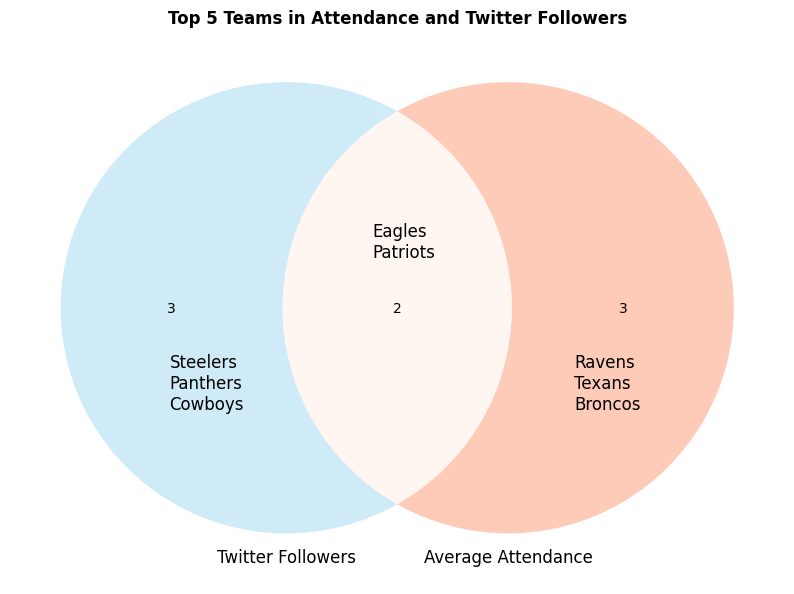

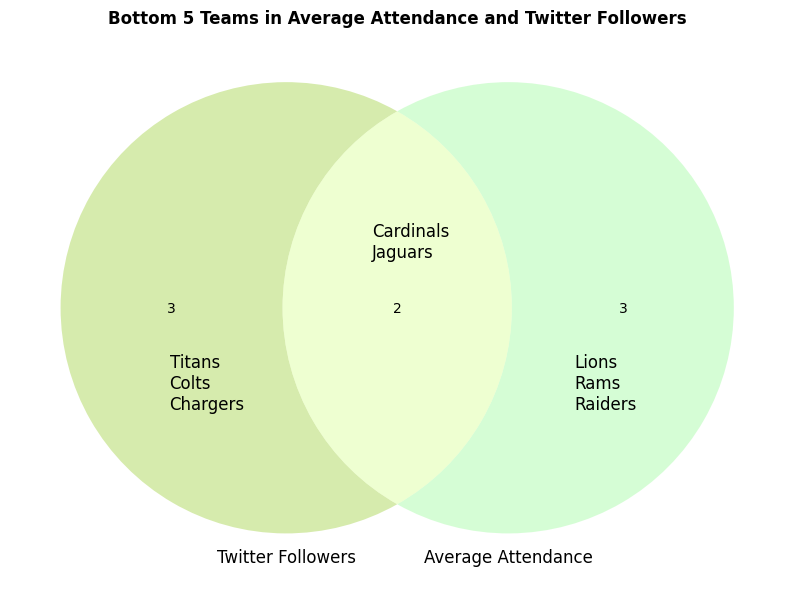

In [55]:
# Create sets that will be used in venn diagram
top5Twit = set(list(twitter['team'].head(5)))
bot5Twit = set(list(twitter['team'].tail(5)))
top5Atten = set(list(top5_df['home_team_name'].unique()))
bot5Atten = set(list(bot5_df['home_team_name'].unique()))

# Find the Intersection and the differences of both sets
# For Top 5 teams
intTop = top5Twit.intersection(top5Atten)
diffTopTwit = top5Twit.difference(top5Atten)
diffTopAtten = top5Atten.difference(top5Twit)

# For bottom 5 teams
intBot = bot5Twit.intersection(bot5Atten)
diffBotTwit = bot5Twit.difference(bot5Atten)
diffBotAtten = bot5Atten.difference(bot5Twit)

# Display venn diagram for top 5 teams
plt.figure(figsize=[10,10])
venn3(subsets=(len(diffTopTwit), len(diffTopAtten), len(intTop), 0, 0, 0, 0),set_labels=('Twitter Followers', 'Average Attendance'),set_colors=('skyblue','coral','purple'))
plt.annotate('\n'.join(diffTopTwit), xy=(-0.45, -0.2), fontsize=12, color='black')
plt.annotate('\n'.join(diffTopAtten), xy=(0.35, -0.2), fontsize=12, color='black')
plt.annotate('\n'.join(intTop), xy=(-0.05, 0.1), fontsize=12, color='black')
plt.title('Top 5 Teams in Attendance and Twitter Followers',fontweight='bold')
plt.show()

# Display venn diagram for bottom 5 teams
plt.figure(figsize=[10,10])
venn3(subsets=(len(diffBotTwit), len(diffBotAtten), len(intBot), 0, 0, 0, 0),set_labels=('Twitter Followers', 'Average Attendance'),set_colors=('yellowgreen','palegreen','purple'))
plt.annotate('\n'.join(diffBotTwit), xy=(-0.45, -0.2), fontsize=12, color='black')
plt.annotate('\n'.join(diffBotAtten), xy=(0.35, -0.2), fontsize=12, color='black')
plt.annotate('\n'.join(intBot), xy=(-0.05, 0.1), fontsize=12, color='black')
plt.title('Bottom 5 Teams in Average Attendance and Twitter Followers',fontweight='bold')
plt.show()

